<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Exercise_W5D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d shariful07/student-mental-health

Saving kaggle.json to kaggle.json
  0% 0.00/1.62k [00:00<?, ?B/s]
100% 1.62k/1.62k [00:00<00:00, 3.73MB/s]


In [2]:
!unzip student-mental-health.zip

Archive:  student-mental-health.zip
  inflating: Student Mental health.csv  


In [3]:
import pandas as pd
mental_health = pd.read_csv('Student Mental health.csv')

In [4]:
print(mental_health.head(10))

        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   
5  8/7/2020 12:31               Male  19.0          Engineering   
6  8/7/2020 12:32             Female  23.0     Pendidikan islam   
7  8/7/2020 12:33             Female  18.0                  BCS   
8  8/7/2020 12:35             Female  19.0      Human Resources   
9  8/7/2020 12:39               Male  18.0                Irkhs   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No  

In [103]:
print(mental_health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Timestamp                                     100 non-null    datetime64[ns]
 1   Choose your gender                            100 non-null    object        
 2   Age                                           100 non-null    float64       
 3   What is your course?                          100 non-null    object        
 4   Your current year of Study                    100 non-null    object        
 5   What is your CGPA?                            100 non-null    object        
 6   Marital status                                100 non-null    object        
 7   Do you have Depression?                       100 non-null    object        
 8   Do you have Anxiety?                          100 non-null    object   

Exercise 1 : Visualizing The Distribution Of CGPA

In [6]:
# Convert 'Timestamp' column to datetime data type
mental_health['Timestamp'] = pd.to_datetime(mental_health['Timestamp'])

In [7]:
print(mental_health.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Timestamp                                     101 non-null    datetime64[ns]
 1   Choose your gender                            101 non-null    object        
 2   Age                                           100 non-null    float64       
 3   What is your course?                          101 non-null    object        
 4   Your current year of Study                    101 non-null    object        
 5   What is your CGPA?                            101 non-null    object        
 6   Marital status                                101 non-null    object        
 7   Do you have Depression?                       101 non-null    object        
 8   Do you have Anxiety?                          101 non-null    object  

In [27]:
# Find duplicate entries
duplicate_rows = mental_health.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

if num_duplicates > 0:
    print("Number of duplicate rows:", num_duplicates)
    print("Duplicate rows:")
    print(mental_health[duplicate_rows])
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [28]:
# Drop rows with missing values
mental_health.dropna(inplace=True)

# Reset index after dropping rows
mental_health.reset_index(drop=True, inplace=True)

# Print the updated DataFrame information
print(mental_health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Timestamp                                     100 non-null    datetime64[ns]
 1   Choose your gender                            100 non-null    object        
 2   Age                                           100 non-null    float64       
 3   What is your course?                          100 non-null    object        
 4   Your current year of Study                    100 non-null    object        
 5   What is your CGPA?                            100 non-null    object        
 6   Marital status                                100 non-null    object        
 7   Do you have Depression?                       100 non-null    object        
 8   Do you have Anxiety?                          100 non-null    object   

In [30]:
# Remove extra spaces from all columns in the DataFrame
mental_health = mental_health.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# 1. Extract unique CGPA categories and sort them
unique_cgpa_values = mental_health['What is your CGPA?'].unique()
unique_cgpa_values.sort()
print(unique_cgpa_values)

['0 - 1.99' '2.00 - 2.49' '2.50 - 2.99' '3.00 - 3.49' '3.50 - 4.00']


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Group the data by CGPA categories and count the occurrences in each category
cgpa_counts = mental_health['What is your CGPA?'].value_counts().reindex(unique_cgpa_values)
cgpa_counts

0 - 1.99        3
2.00 - 2.49     2
2.50 - 2.99     4
3.00 - 3.49    43
3.50 - 4.00    48
Name: What is your CGPA?, dtype: int64

In [126]:
# 3. Create a new DataFrame with CGPA categories and their counts
cgpa_data = pd.DataFrame({'CGPA': cgpa_counts.index, 'Count': cgpa_counts.values})
print(cgpa_data.head())

          CGPA  Count
0     0 - 1.99      3
1  2.00 - 2.49      2
2  2.50 - 2.99      4
3  3.00 - 3.49     43
4  3.50 - 4.00     48


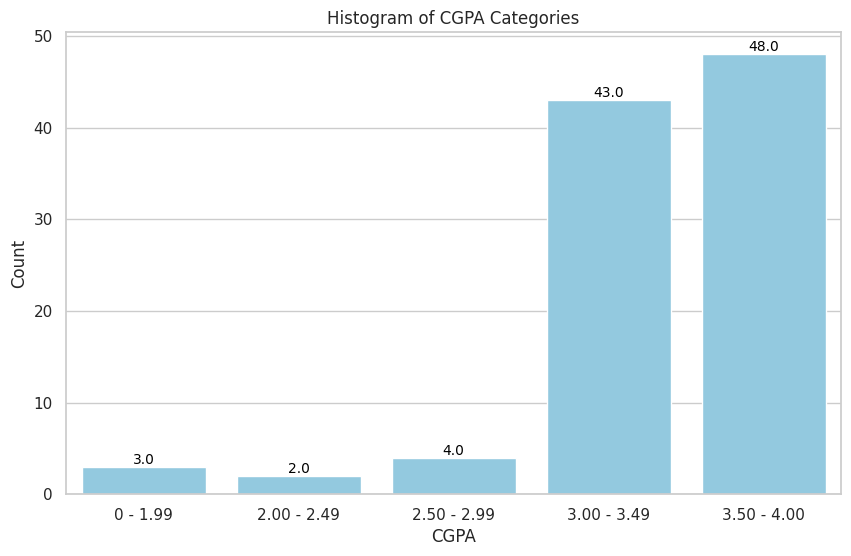

In [47]:
# Plot the histogram
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cgpa_data, x='CGPA', y='Count', color='skyblue')

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title
plt.title('Histogram of CGPA Categories')

# Show plot
plt.show()

Exercise 2: Comparing Anxiety Levels Across Different Genders

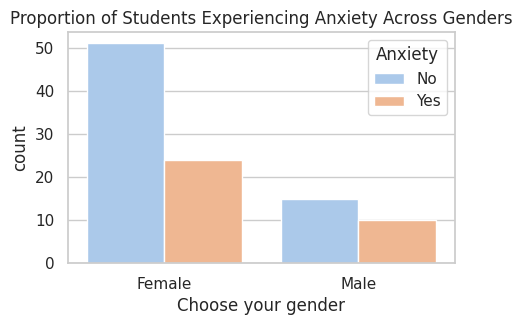

In [50]:
# Create the bar plot
plt.figure(figsize=(5, 3))
sns.countplot(data=mental_health, x='Choose your gender', hue='Do you have Anxiety?', palette='pastel')

# Add a title
plt.title('Proportion of Students Experiencing Anxiety Across Genders')

# Add a legend
plt.legend(title='Anxiety', loc='upper right')

# Show plot
plt.show()

Exercise 3: Exploring The Relationship Between Age And Panic Attacks

In [91]:
# Selecting required columns from the existing dataset
panic_attack_data = mental_health[['Age', 'Do you have Panic attack?']].copy()

# Displaying first few rows of the new dataset
print(panic_attack_data.head())

    Age Do you have Panic attack?
0  18.0                       Yes
1  21.0                        No
2  19.0                       Yes
3  22.0                        No
4  23.0                        No


In [99]:
print(panic_attack_data.head())

    Age Do you have Panic attack?  Panic_Attacks
0  18.0                       Yes              1
1  21.0                        No              0
2  19.0                       Yes              1
3  22.0                        No              0
4  23.0                        No              0


In [100]:
# 1. Extract unique CGPA categories and sort them
unique_cgpa_values = mental_health['Age'].unique()
unique_cgpa_values.sort()
print(unique_cgpa_values)

[18. 19. 20. 21. 22. 23. 24.]


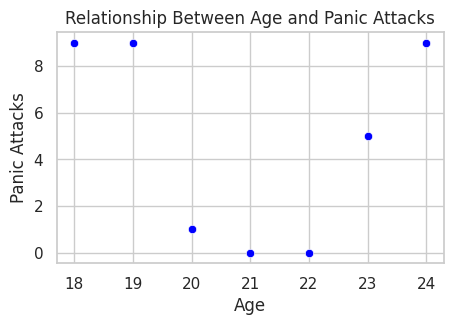

In [101]:
# Convert panic attack responses to numeric (Yes=1, No=0)
panic_attack_data['Panic_Attacks'] = panic_attack_data['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Group the data by age and calculate the sum of panic attacks for each age
age_panic_counts = panic_attack_data.groupby('Age')['Panic_Attacks'].sum().reset_index()

# Create the scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(data=age_panic_counts, x='Age', y='Panic_Attacks', color='blue')

# Add a title
plt.title('Relationship Between Age and Panic Attacks')

# Add labels
plt.xlabel('Age')
plt.ylabel('Panic Attacks')

# Show plot
plt.show()

Exercise 4: Visualizing Pairwise Relationships With Seaborn Pair Plot

In [104]:
# Select relevant columns from the dataset
subset_columns = ['Age', 'CGPA_numeric', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
subset_data = mental_health[subset_columns]
print(subset_data.head())

    Age  CGPA_numeric Do you have Depression? Do you have Anxiety?  \
0  18.0          3.25                     Yes                   No   
1  21.0          3.25                      No                  Yes   
2  19.0          3.25                     Yes                  Yes   
3  22.0          3.25                     Yes                   No   
4  23.0          3.25                      No                   No   

  Do you have Panic attack?  
0                       Yes  
1                        No  
2                       Yes  
3                        No  
4                        No  


In [ ]:
# Convert responses to binary numeric values (Yes=1, No=0)
subset_data['Depression'] = subset_data['Do you have Depression?'].map({'Yes': 1, 'No': 0})
subset_data['Anxiety'] = subset_data['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
subset_data['Panic_Attacks'] = subset_data['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

In [140]:
print(subset_data.head())

    Age  CGPA_numeric  Depression  Anxiety  Panic_Attacks
0  18.0          3.25           1        0              1
1  21.0          3.25           0        1              0
2  19.0          3.25           1        1              1
3  22.0          3.25           1        0              0
4  23.0          3.25           0        0              0


In [138]:
# Unique values of CGPA_numeric
unique_cgpa_values = [1.5, 2.25, 2.75, 3.25, 3.75]

# Create dummy variables for each unique value of CGPA_numeric
dummy_cgpa = pd.get_dummies(subset_data['CGPA_numeric'])

# Merge the dummy variables with the original DataFrame based on 'Age'
merged_data = pd.concat([subset_data, dummy_cgpa], axis=1)

# Print the head of the merged DataFrame to verify
print(merged_data.head())

    Age  CGPA_numeric  Depression  Anxiety  Panic_Attacks  1.5  2.25  2.75  \
0  18.0          3.25           1        0              1    0     0     0   
1  21.0          3.25           0        1              0    0     0     0   
2  19.0          3.25           1        1              1    0     0     0   
3  22.0          3.25           1        0              0    0     0     0   
4  23.0          3.25           0        0              0    0     0     0   

   3.25  3.75  
0     1     0  
1     1     0  
2     1     0  
3     1     0  
4     1     0  


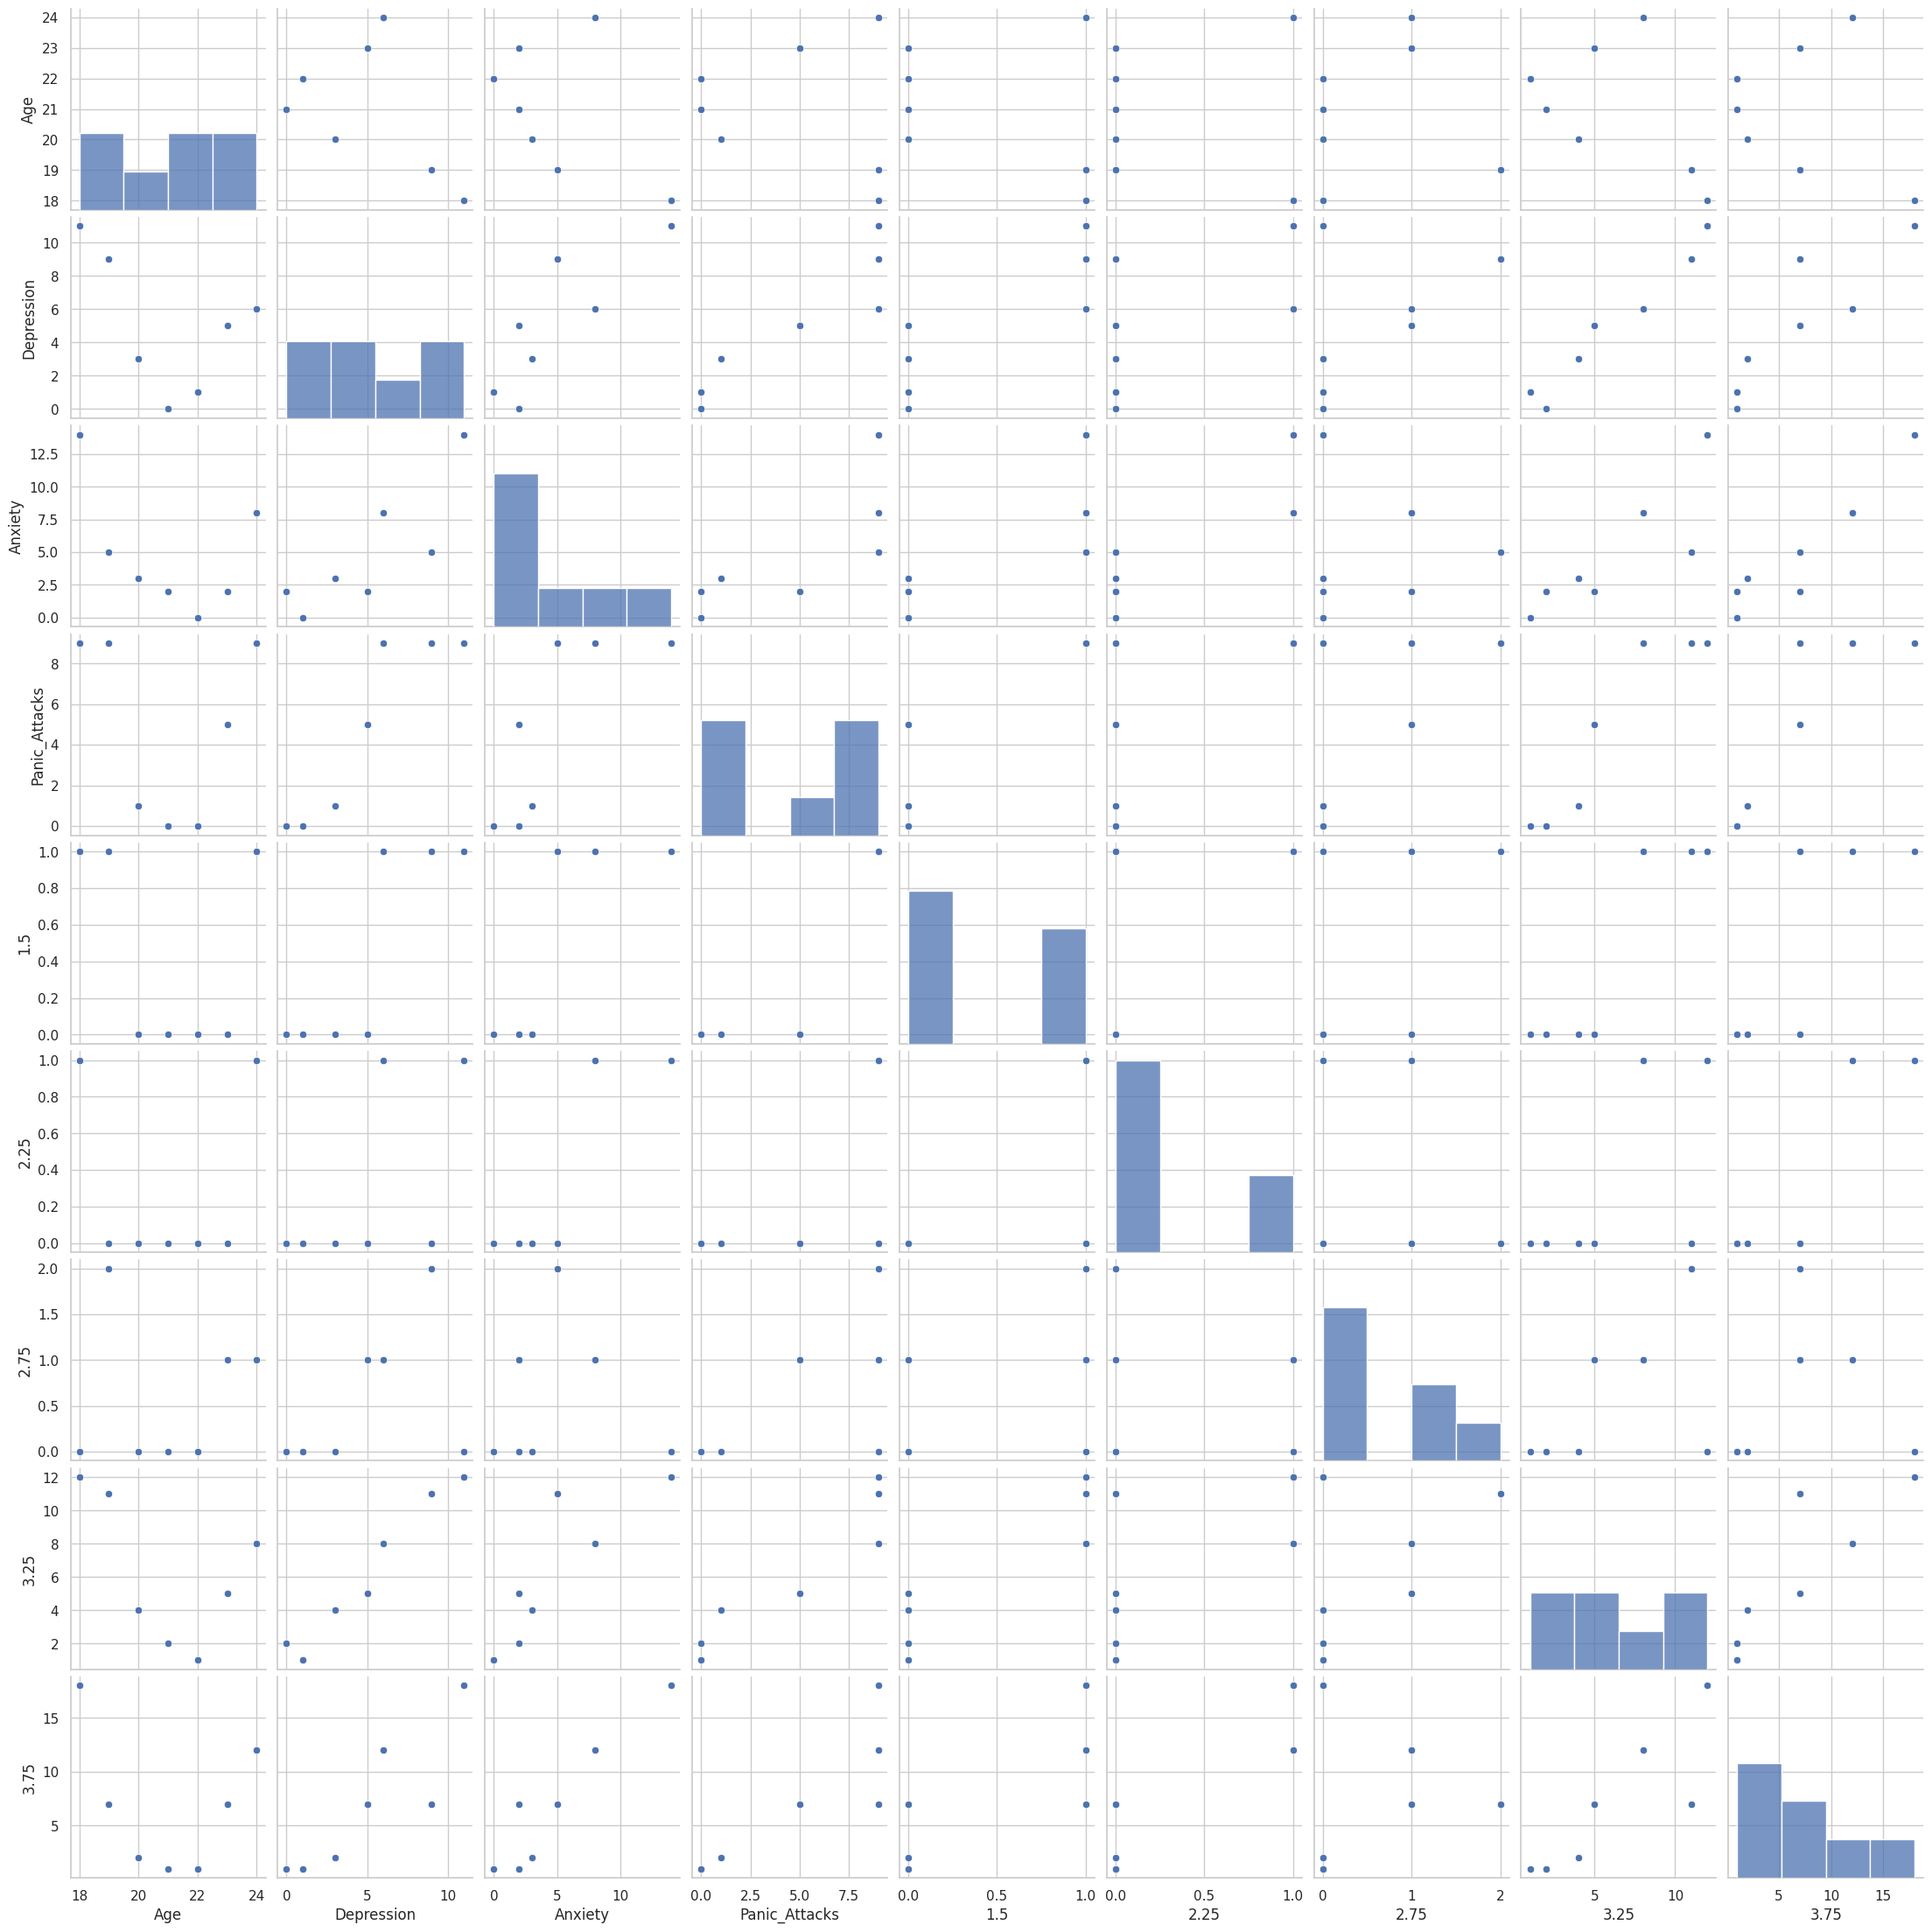

In [142]:
# Create dummy variables for each unique value of CGPA_numeric
dummy_cgpa = pd.get_dummies(subset_data['CGPA_numeric'])

# Merge the dummy variables with the original DataFrame based on 'Age'
merged_data = pd.concat([subset_data, dummy_cgpa], axis=1)

# Group the data by age and calculate the sum of each disease for each age group
disease_counts = merged_data.groupby('Age').agg({
    'Depression': 'sum',
    'Anxiety': 'sum',
    'Panic_Attacks': 'sum',
    1.5: 'sum',
    2.25: 'sum',
    2.75: 'sum',
    3.25: 'sum',
    3.75: 'sum'
}).reset_index()

# Create pairplot using subset of disease_counts DataFrame
sns.pairplot(disease_counts[['Age', 'Depression', 'Anxiety', 'Panic_Attacks', 1.5, 2.25, 2.75, 3.25, 3.75]])

# Show plot
plt.show()

Exercise 5: Creating A Heatmap To Visualize Correlations

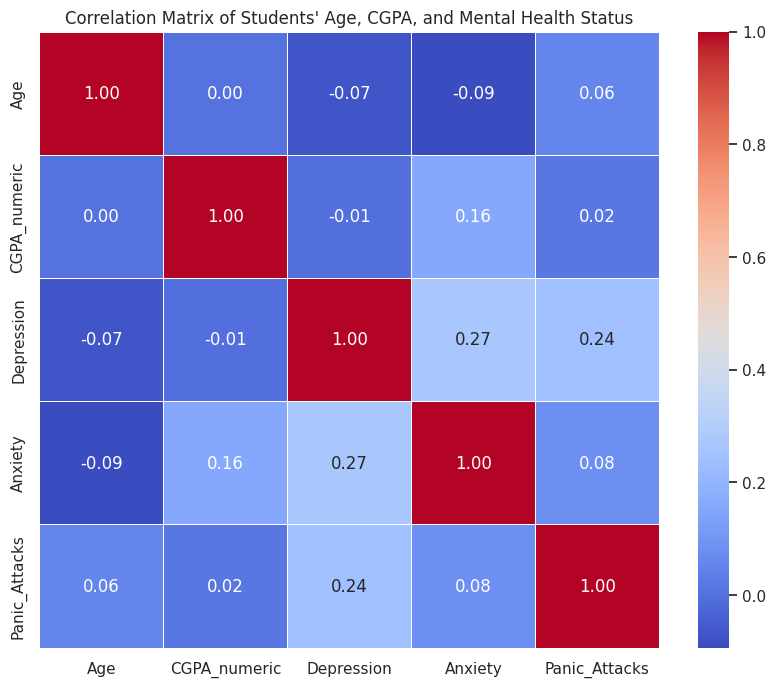

In [143]:
# Select the relevant subset of your dataset
subset = subset_data[['Age', 'CGPA_numeric', 'Depression', 'Anxiety', 'Panic_Attacks']]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Students\' Age, CGPA, and Mental Health Status')
plt.show()

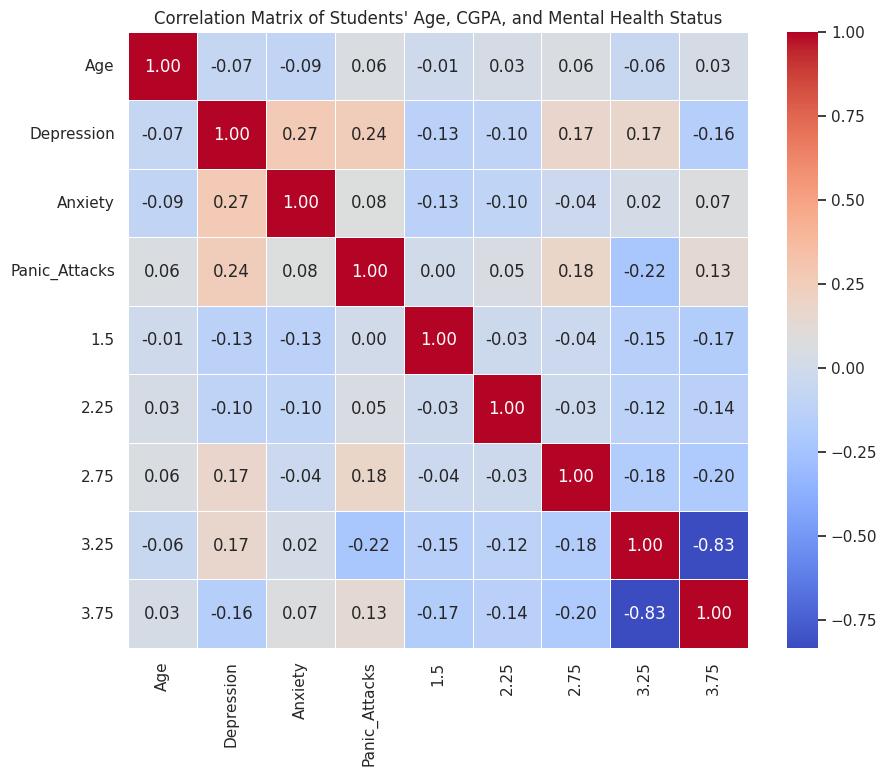

In [144]:
# Select the relevant subset of your dataset
subset = merged_data[['Age', 'Depression', 'Anxiety', 'Panic_Attacks', 1.5, 2.25, 2.75, 3.25, 3.75]]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Students\' Age, CGPA, and Mental Health Status')
plt.show()

Exercise 6: Analyzing Distributions And Relationships Using FacetGrid

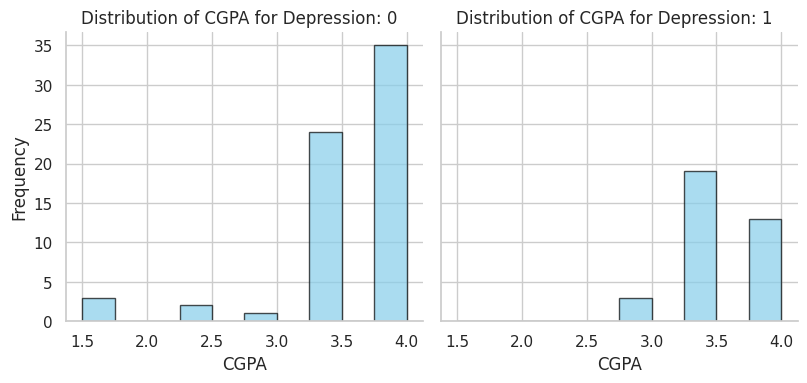

In [154]:
# Filter the data based on depression status
# depressed_students = subset_data[subset_data['Depression'] == 1]
# non_depressed_students = subset_data[subset_data['Depression'] == 0]

# Create a FacetGrid for CGPA segmented by depression status
grid = sns.FacetGrid(subset_data, col="Depression", hue="Depression", height=4)

# Map a histogram plot to each facet with appropriate customizations
grid.map(plt.hist, "CGPA_numeric", bins=10, alpha=0.7, color='skyblue', edgecolor='black', range=(1.5, 4))

# Add titles and labels
grid.set_titles("Distribution of CGPA for Depression: {col_name}  ")
grid.set_axis_labels("CGPA", "Frequency")

# Show the plot
plt.show()